## <center>Q&A Activity Week - 15

### 1) Loading the dataset into python environment

In [1]:
import pandas as pd
Titanic= pd.read_csv('titanic_dataset.csv')

In [2]:
Titanic   # checking the overall structure of the dataset

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


The given dataset consist of 891 rows and 12 columns.

Each row represents a person who travelled in titanic.The columns are 'Passenger -id' ,'Survived':indicating survival status,'Pclass'(representing Passenger class), 'Name', 'Sex', 'Age', 'SibSp'(representing number of siblings or spouse of a person onboard), 'Parch'( representing number of parents or children on board), 'Ticket','Fare', 'Cabin', 'Embarked'(indicates joining station:Southampton, Cherbourg, and Queenstown)

### 2) Pre-processing

#### 2.1) Checking for null values

In [3]:
Titanic.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Embarked column has 2 null values,whereas Age has 177 null values and  Cabin has 687 null values.
Embarked and Cabin are categorical columns whereas Age is a numerical column.

#### 2.2) Filling the missing values

##### 2.2.1) Filling 'Embarked' column 

Embarked is a categorical column which can have 3 values : S,C and Q representing Southampton, Cherbourg, and Queenstown from where the traveller boarded the ship.
Embarked column has only 2 missing values and Mode method can be used to fill in the values.

In [4]:
Titanic['Embarked']=Titanic['Embarked'].fillna(Titanic['Embarked'].mode()[0])

#### 2.2.2) Filling 'Age' column

Age is a numerical column and has 177 values missing contributing the 19.7% of age column.Plotting age column using box plot to decide whether mean or median is more suitable for replacing the missing values.

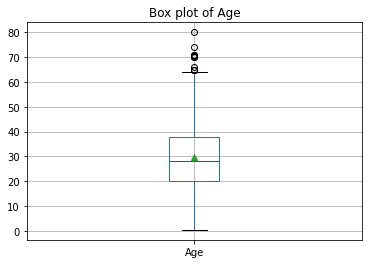

In [5]:
import matplotlib.pyplot as plt
plt.title('Box plot of Age')
medianprops = dict(color="red",linewidth=1)
Titanic.boxplot(column='Age', return_type='axes',showmeans=True,medianprops=medianprops)
plt.show()

Box plot shows the overall range of Age and its symmetrically spread,so mean or median can be used to fill in the values.

In [6]:
# Extracting Salutations from Name column 
for i in Titanic:
    Titanic['Title']=Titanic.Name.str.extract('([A-Za-z]+)\.') # extracting the Salutations

In [7]:
Titanic['Title']

0        Mr
1       Mrs
2      Miss
3       Mrs
4        Mr
       ... 
886     Rev
887    Miss
888    Miss
889      Mr
890      Mr
Name: Title, Length: 891, dtype: object

In [8]:
# Finding the mean age by grouping based on prime features such as Title and Pclass.
# Fare and gender base grouping not necessary since the above better represent the classification
#Using median to fill-in values in case of any extremities.

In [9]:
Titanic.groupby(['Title','Pclass'])['Age'].median()

Title     Pclass
Capt      1         70.0
Col       1         58.0
Countess  1         33.0
Don       1         40.0
Dr        1         46.5
          2         38.5
Jonkheer  1         38.0
Lady      1         48.0
Major     1         48.5
Master    1          4.0
          2          1.0
          3          4.0
Miss      1         30.0
          2         24.0
          3         18.0
Mlle      1         24.0
Mme       1         24.0
Mr        1         40.0
          2         31.0
          3         26.0
Mrs       1         41.5
          2         32.0
          3         31.0
Ms        2         28.0
Rev       2         46.5
Sir       1         49.0
Name: Age, dtype: float64

In [10]:
# Filling in the missing values of age column by median found out using the above grouping.
l_col=['Title','Pclass']
Titanic['Age'] = Titanic['Age'].fillna(Titanic.groupby(l_col)['Age'].transform('median'))

#### 2.2.3) Filling 'Cabin' column

In [11]:
sum(pd.isnull(Titanic['Cabin']))

687

In [12]:
Titanic['Cabin'].nunique()

147

It can be observed that the categorical column Cabin has 687 missing values contributing to 77.1% of values in the respective column.Cabin is assigned based on the class of tickets bought. If the cabins were near to lifeboats then people had easy and early access to them and therefore survival rate would have been better.But since too much data is missing, its not advisable to fill the values by mode. 
Missing value may also mean: People didn’t had a specific cabin (as lower class tickets were cheap) and many would have stayed in a big lobby or room or the data is simply missing.
So filling the null values in Cabin column as'Unknown'.

In [13]:
Titanic.Cabin = Titanic.Cabin.fillna('Unknown')

#### 2.2.4)  Checking whether all missing are values replaced

In [14]:
Titanic.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
Title          0
dtype: int64

#### 3) creating a new dataframe with relevant columns

In [15]:
#Dropping PassengerId,Name,Ticket,Cabin(Since most values are unknown),and recently added 'Title' column
#Taking only those columns which are helpful in training the model.

In [16]:
T=Titanic.copy()
T.drop(['PassengerId','Name','Ticket','Cabin','Title'],axis=1,inplace=True)

In [17]:
T.head(5)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


#### 4) Encoding the categorical columns

In [18]:
T['Sex'] = T['Sex'].replace(["female", "male"], [0, 1])
T['Embarked'] = T['Embarked'].replace(['S', 'C', 'Q'], [1, 2, 3])

In [19]:
# Checking correlation coefficients,since Naive Bayes classifier expects the features to be independent.
# Survived is the dependent feature and all others are independent features.

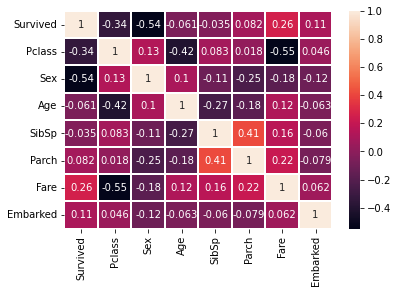

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
corr_matrix=T.corr()
sns.heatmap(corr_matrix,linewidths=0.2,annot=True)
plt.show()

In [21]:
# P Class and Fare are highly negatively correlated.
#Dropping Fare,especially since P class is more correlated to the target 'Survived' than Fare. 

In [22]:
T.drop(['Fare'],axis=1,inplace=True)

In [23]:
# using Standard scaling to scale the real numerical column Age

In [24]:
from sklearn import preprocessing
standardisation=preprocessing.StandardScaler()
T[['Age']]=standardisation.fit_transform(T[['Age']])

### 3) Applying GaussianNB Classifier to predict the surival status

In [25]:
# spliiting the dataset into features and target
#Taking survived as the target and all other as features
X=T.drop(['Survived'],axis=1)
y=T['Survived']
# splitting into test and training set
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42,test_size=0.20)

In [26]:
X_train.shape

(712, 6)

Training set consist of 712 data points

In [27]:
X_test.shape

(179, 6)

Testing set consist of 179 data points

In [28]:
#Naive Bayes classifier on the data set
from sklearn.naive_bayes import GaussianNB
NB_model=GaussianNB()
NB_model.fit(X_train,y_train)
y_pred=NB_model.predict(X_test)

In [29]:
y_pred

array([0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 1], dtype=int64)

In [30]:
# Evaluating the model using confusion matrix and accuracy score

In [31]:
from sklearn.metrics import accuracy_score, confusion_matrix
confusion_matrix(y_test,y_pred)

array([[80, 25],
       [17, 57]], dtype=int64)

Out of 179 predictions,137 predicitons were correct

In [32]:
print("Accuracy is:",round(accuracy_score(y_test,y_pred),3))

Accuracy is: 0.765


###  4)Using hyper parameter tuning on GaussianNB Classifier

In [33]:
# Dsplaying the parameters in GaussianNB
print(NB_model.get_params())

{'priors': None, 'var_smoothing': 1e-09}


In [34]:
# Using GridSearchCV to find the optimum parameters
import numpy as np
from sklearn.model_selection import GridSearchCV
params_NB = {'var_smoothing': np.logspace(0,-9, num=100)}
NB_grid = GridSearchCV(estimator=GaussianNB(), 
                 param_grid=params_NB, 
                 cv=10,   
                 verbose=1, 
                 scoring='accuracy') 
NB_grid.fit(X_train, y_train)
print(NB_grid.best_params_)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits
{'var_smoothing': 0.008111308307896872}


In [35]:
y_pred=NB_grid.best_estimator_.predict(X_test)

In [36]:
#Evaluating the model

In [37]:
confusion_matrix(y_test,y_pred)

array([[80, 25],
       [17, 57]], dtype=int64)

In [38]:
print("Accuracy is:",round(accuracy_score(y_test,y_pred),3))

Accuracy is: 0.765


Performance doesn't improve after Hyper parameter tuning.
Naive Bayes classifier has a very limited parameter set.So, hyper-parameter tuning may not be considered as a valid method to improve Naive Bayes classifier accuracy. 